# **AGRILINKS PROJECT**
KRISH BALAR
Email - krishbalar7@gmail.com

In [40]:
#importing libraries
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#importing data set using pandas
from google.colab import files 
uploaded = files.upload()
import io
agri_data = pd.read_csv('agriculture.csv', error_bad_lines=False)

print(agri_data.shape)
agri_data.head()

Saving agriculture.csv to agriculture (2).csv
(1827, 10)


,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020/12/30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020/12/29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020/12/28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020/12/27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020/12/26


In [42]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl no.                     1827 non-null   int64 
 1   District Name              1827 non-null   object
 2   Market Name                1827 non-null   object
 3   Commodity                  1827 non-null   object
 4   Variety                    1827 non-null   object
 5   Grade                      1827 non-null   object
 6   Min Price (Rs./Quintal)    1827 non-null   int64 
 7   Max Price (Rs./Quintal)    1827 non-null   int64 
 8   Modal Price (Rs./Quintal)  1827 non-null   int64 
 9   Price Date                 1827 non-null   object
dtypes: int64(4), object(6)
memory usage: 142.9+ KB


In [43]:
#making copy of data to keep original data safe
c_data = agri_data.copy()

In [44]:
c_data.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [45]:
#checking null value
c_data.isnull().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64



*   There are no null values so we can continue




In [46]:
price_data = c_data[['Price Date','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Modal Price (Rs./Quintal)']]

In [47]:
#printing price data    TASK (A)
price_data

,Price Date,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,2020/12/30,900,1000,950
1,2020/12/29,800,900,850
2,2020/12/28,850,950,900
3,2020/12/27,800,900,850
4,2020/12/26,800,900,850
...,...,...,...,...
1822,2020/01/06,1000,1200,1100
1823,2020/01/05,1000,1200,1100
1824,2020/01/04,1100,1300,1200
1825,2020/01/02,1100,1300,1200


In [48]:
c_data

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020/12/30
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020/12/29
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020/12/28
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020/12/27
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020/12/26
...,...,...,...,...,...,...,...,...,...,...
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020/01/06
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000,1200,1100,2020/01/05
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020/01/04
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100,1300,1200,2020/01/02


## **PART B**

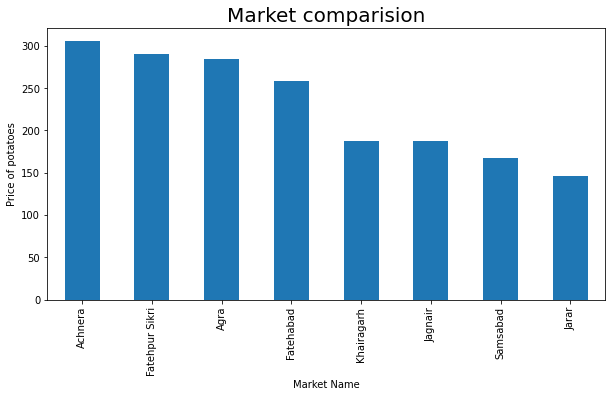

In [49]:
plt.figure(figsize=(10,5))
c_data.groupby(['Market Name'])['Modal Price (Rs./Quintal)'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Price of potatoes')
plt.title("Market comparision",fontsize=20)
plt.show()

In [50]:
#analyzing minimuim and maximuim value of potatoes in year
df1 = agri_data.copy()
df1.sort_values('Min Price (Rs./Quintal)',inplace=True)
df1.head(20)
df1.tail()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1501,1502,Agra,Khairagarh,Potato,Desi,FAQ,2900,3000,2950,2020/12/01
329,330,Agra,Agra,Potato,Desi,FAQ,2900,3100,3000,2020/12/03
330,331,Agra,Agra,Potato,Desi,FAQ,2900,3150,3050,2020/12/02
1169,1170,Agra,Jagnair,Potato,Desi,FAQ,3000,3200,3100,2020/11/25
27,28,Agra,Achnera,Potato,Desi,FAQ,3750,3850,3800,2020/11/29




## *  Major markets in Agra are


1.   Achnera
2.   Fatehpur Sikri
3.   Agra
4.   Fatehabad
5.   Khairagarh
6.   Jagnair
7.   Samsabad
8.   Jarar






# **Trends observed in Markets are :-**


*   Achenera market has the highest price of potatoes throughout the year
*   Jarar market has the lowest price of potatoes throughout the year
*   Fatehpur Sikri and Agra market has almost same price of potatoes
*   Khairagarh and Jagnair market has same price of potatoes
*   Lowest price of potatoes in year 2020 was 500 INR per quintal in Fatehabad market
*   Highest price of potatoes in year 2020 was 3850 INR per quintal in Achnera market







# **Machine Learning**

In [51]:
# Import libraries for train test split
from sklearn.model_selection import train_test_split

# import Ilbrary for Scaling
from sklearn.preprocessing import StandardScaler

# import Ilbrary for Model Building
from sklearn.linear_model import LinearRegression


In [52]:
#creating copy of data
ml_data = agri_data.copy()

In [53]:
#Applying mean encoding for Market name
name = ml_data.groupby('Market Name')['Modal Price (Rs./Quintal)'].mean()
ml_data['Market Name'] = ml_data['Market Name'].map(name)

print(ml_data['Market Name'])

0       1695.212418
1       1695.212418
2       1695.212418
3       1695.212418
4       1695.212418
           ...     
1822    1141.517857
1823    1141.517857
1824    1141.517857
1825    1141.517857
1826    1141.517857
Name: Market Name, Length: 1827, dtype: float64


In [54]:
#dropping unwanted columns
ml_data = ml_data.drop(['Sl no.','District Name','Commodity','Variety','Grade','Price Date'],axis = 1)
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Market Name                1827 non-null   float64
 1   Min Price (Rs./Quintal)    1827 non-null   int64  
 2   Max Price (Rs./Quintal)    1827 non-null   int64  
 3   Modal Price (Rs./Quintal)  1827 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 57.2 KB


In [55]:
agri_train,agri_test = train_test_split(ml_data,train_size = 0.7,random_state = 42)

In [56]:
print(agri_train.shape)
print(agri_test.shape)

(1278, 4)
(549, 4)


In [57]:
# Divide tarin set into Dependent and independent variables
y_train = agri_train.pop('Modal Price (Rs./Quintal)')

X_train = agri_train


# Divide test set into Dependent and independent variables
y_test = agri_test.pop('Modal Price (Rs./Quintal)')

X_test = agri_test

In [58]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
count,1.278000e+03,1.278000e+03,1.278000e+03
mean,4.347070e-16,8.131211e-17,-1.531552e-16
std,1.000391e+00,1.000391e+00,1.000391e+00
min,-1.645505e+00,-2.489489e+00,-2.645209e+00
25%,-9.890821e-01,-7.013084e-01,-5.557460e-01
50%,-3.706573e-01,-2.542631e-01,-2.162082e-01
75%,9.796501e-01,5.012434e-01,4.889857e-01
max,1.064163e+00,4.216190e+00,4.058486e+00


In [59]:
# Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Market Name,Min Price (Rs./Quintal),Max Price (Rs./Quintal)
count,549.000000,549.000000,549.000000
mean,-0.026815,0.003623,0.013845
std,1.027077,1.018673,1.019901
min,-1.645505,-2.489489,-2.645209
25%,-0.989082,-0.701308,-0.555746
50%,-0.370657,-0.307909,-0.294563
75%,0.979650,0.550418,0.576047
max,1.064163,2.606827,2.752571


In [65]:
# Build the model
lr = LinearRegression()

agri_reg = lr.fit(X_train,y_train)

In [66]:
# the r2 score
agri_reg.score(X_train,y_train)

0.8986258114018534

In [67]:
# r2 for test data
agri_reg.score(X_test,y_test)

0.9203751298241817

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


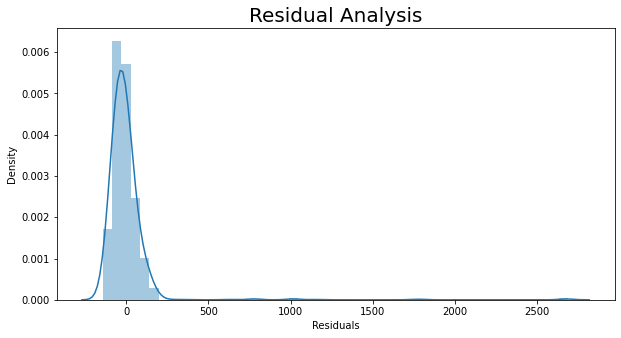

In [68]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = agri_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

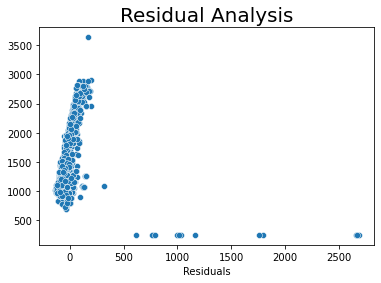

In [69]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

In [70]:
# Print coef
print("Coef are:",agri_reg.coef_)

#print intercept
print("Intercept is",agri_reg.intercept_)

Coef are: [ 40.99814669 455.32326422  50.51690724]
Intercept is 1473.6580594679185


In [71]:
model = str(agri_reg.intercept_)

for i in range(len(agri_reg.coef_)):
    model = model +' + '  +(str(agri_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print(model)

1473.6580594679185 + 40.99814669304106 * Market Name + 455.32326421849 * Min Price (Rs./Quintal) + 50.51690723857695 * Max Price (Rs./Quintal)


## **The final result we get is the formula :-**
**To calculate future price of potatoes, the formula is: -** 1473.6580594679185 + 40.99814669304106 * Market Name + 455.32326421849 * Min Price (Rs./Quintal) + 50.51690723857695 * Max Price (Rs./Quintal)